In [2]:
import gymnasium as gym
import numpy as np
import random


In [3]:
env = gym.make('Taxi-v3', render_mode='ansi')
state, info = env.reset()

env.reset()
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [4]:
# lets see how many discrete states are possible in this environment (Taxi position * passenger position * destination position)
# should be 500
print("Observation Space:", env.observation_space)

Observation Space: Discrete(500)


In [5]:
# lets see how many actions are possible in this environment
print("Action Space:", env.action_space)


Action Space: Discrete(6)


In [12]:
# each state is a number between 0 and 499.
# using "decode" we can get the taxi position, passenger position, and destination position

state, info = env.reset()
taxi_row, taxi_col, passenger_location, destination = env.unwrapped.decode(state)

print(f"State: {state}")
print(f"Taxi Position: ({taxi_row}, {taxi_col})")
print(f"Passenger Location: {passenger_location}")
print(f"Destination: {destination}")

# to clarify the passenger / taxi destination: 0 = R, 1 = G, 2 = Y, 3 = B, 4 = in taxi(only for passenger)


# the taxi is represented by the yellow rectangle
# the pickup locations are represented by the letters R, G, Y, B
# the passenger locations are marked


State: 264
Taxi Position: (2, 3)
Passenger Location: 1
Destination: 0


In [13]:
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [14]:
action_meanings = {
    0: "Move South",
    1: "Move North",
    2: "Move East",
    3: "Move West",
    4: "Pick Up Passenger",
    5: "Drop Off Passenger"
}

In [15]:
# lets see what happens when we take a random action

action = env.action_space.sample() # take a random action
print(f"Selected Action: {action_meanings[action]}") # print the selected action

new_state, reward, terminated, truncated, info = env.step(action) # take the action
print(f"New State: {new_state}") # print the new state
print(f"Reward: {reward}") # print the reward
print(f"Terminated: {terminated}") # print if the episode is terminated
print(f"Truncated: {truncated}") # print if the episode is truncated

# Decode the new state
taxi_row, taxi_col, passenger_location, destination = env.unwrapped.decode(new_state)
print(f"Taxi Position: ({taxi_row}, {taxi_col})")
print(f"Passenger Location: {passenger_location}")
print(f"Destination: {destination}")

# Render the new state
print(env.render())

Selected Action: Move North
New State: 164
Reward: -1
Terminated: False
Truncated: False
Taxi Position: (1, 3)
Passenger Location: 1
Destination: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)



Reward:


-1 for each step to encourage shorter routes.


-10 for illegal Pickup or Drop-off.


+20 for a successful Drop-off.

Terminated:
**True** when the passenger is successfully dropped off at the destination.

Truncated:
**True** if a time limit is set and exceeded (not common in the default Taxi environment).

In [ ]:
# lets see what happens when we let the agent take random actions until the episode is terminated (no real strategy)

# Define action meanings for readability
action_meanings = {
    0: "South",
    1: "North",
    2: "East",
    3: "West",
    4: "Pickup",
    5: "Drop-off"
}

# Initialize variables
total_reward = 0
steps = 0

# Start a new episode
state, info = env.reset()
terminated = False
truncated = False

print("Initial State:")
print(env.render())

# Main loop
while not terminated and not truncated:
    # Select a random action
    action = env.action_space.sample()
    action_name = action_meanings[action]
    print(f"Step {steps + 1}: Action - {action_name}")

    # Execute the action
    next_state, reward, terminated, truncated, info = env.step(action)

    # Update total rewards and steps
    total_reward += reward
    steps += 1

    # Render the new state
    print(env.render())

    # Update the state
    state = next_state

# Display the results
print(f"Episode completed in {steps} steps with total reward {total_reward}.")


In [17]:
# Training the Agent with Q-Learning

# Get the size of the state and action spaces
state_space_size = env.observation_space.n  # 500
action_space_size = env.action_space.n      # 6

# Initialize the Q-table to zeros
q_table = np.zeros((state_space_size, action_space_size))

# Hyperparameters
alpha = 0.1      # Learning rate
gamma = 0.99     # Discount factor
epsilon = 1    # Exploration rate #default 0.1, but epsilon * 0.99 is useful, then epsilon should be 1
num_episodes = 1000
max_steps_per_episode = 100


# Main Q-learning algorithm
for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False

    for _ in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        if random.uniform(0, 1) < epsilon:
            # Explore: choose a random action
            action = env.action_space.sample()
        else:
            # Exploit: choose the action with the highest Q-value for the current state
            action = np.argmax(q_table[state, :])

        # Perform the action
        next_state, reward, terminated, truncated, info = env.step(action)

        # Update Q-table
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Update state
        state = next_state

        # If the episode is terminated, exit the loop
        if terminated or truncated:
            break

    # Optional: Decay epsilon to reduce exploration over time
        epsilon = epsilon * 0.99


In [18]:
# testing the agent

# Set epsilon to 0 to only exploit learned values
epsilon = 0.0

state, info = env.reset()
terminated = False
truncated = False
steps = 0
total_reward = 0

print("Testing the trained agent...\n")

while not terminated and not truncated:
    action = np.argmax(q_table[state, :])
    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    steps += 1
    print(env.render())

print(f"Test completed in {steps} steps with total reward {total_reward}.")


Testing the trained agent...

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|


In [25]:
# Let's see how the agent trains with some additional logging

# List to hold rewards for each episode
rewards_all_episodes = []

for episode in range(num_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_rewards = 0

    for _ in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        # Perform the action
        next_state, reward, terminated, truncated, info = env.step(action)

        # Update Q-table
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state, :])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        # Update total rewards
        total_rewards += reward

        # Update state
        state = next_state

        if terminated or truncated:
            break

    # Append total rewards for this episode
    rewards_all_episodes.append(total_rewards)


Average reward per hundred episodes:
100: 7.599999999999999
200: 8.259999999999998
300: 8.099999999999998
400: 8.019999999999998
500: 8.06
600: 7.799999999999998
700: 7.790000000000001
800: 7.689999999999996
900: 7.719999999999995
1000: 8.010000000000002


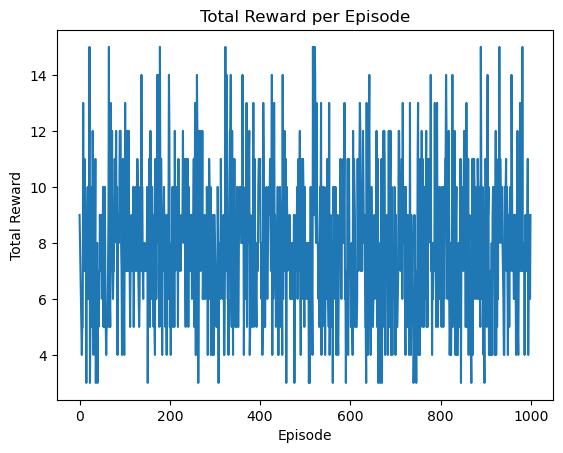

In [26]:
import matplotlib.pyplot as plt

# Calculate and plot the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/100)

count = 100
print("Average reward per hundred episodes:")
for r in rewards_per_thousand_episodes:
    print(f"{count}: {sum(r/100)}")
    count += 100

# Plotting
plt.plot(rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


In [27]:
# We can extract the Policy from the Q-table by selecting the action with the highest Q-value for each state. This is called the Greedy Policy. This is useful for visualizing the learned policy, but only makes sense if we map the states back to the Taxi environment.
policy = np.argmax(q_table, axis=1)
